Lab2 has 3 parts:

The following code is provided to you to understand how full-batch-gradient-descent and stochastic-gradient-descent is implemented to optimize the training of a regression model, using california housing dataset. 

1- Study the code by going through the implementation and provide a high-level algorithm (a pseudocode)corresponding to the solution given below. Make sure that your algorithm is conceptually aligned with the topics discussed in the lecture. 

2- Analyze the SGD abd BGD trends visualized by the code and describe the implications of the plot as a comparison of the two optimization techniques used. 

3- Create a new "Code" cell below the results, and copy and paste the provided code. Then manipluate the code to provide a visualized comparison between SGD, BGD, and Mini-BGD using different batch sizes 2, 5, 7, 10. Report your analysis of the trends seen in the plot. 

dataset size:20640
BGD MSE: 13.526973573329668
SGD MSE: 5.537983162421841


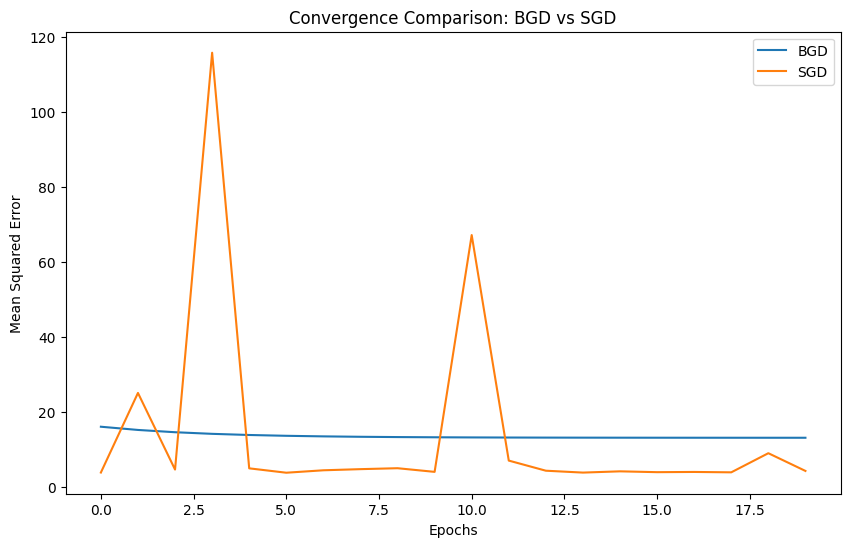

In [4]:
import numpy as np
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Load the California housing dataset
housing_data = fetch_california_housing()
X = housing_data.data
y = housing_data.target
print("dataset size:{}".format(X.shape[0]))

# Spliting the dataset into train and test sets [80:20]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Stansdardizing the attributes of the Dataset
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Add the column of 1 values to X
X_train_scaled = np.c_[np.ones((X_train_scaled.shape[0], 1)), X_train_scaled]
X_test_scaled = np.c_[np.ones((X_test_scaled.shape[0], 1)), X_test_scaled]


# Linear Regression Model
class LinearRegression:
    def __init__(self):
        self.theta = None
    
    def fit(self, X, y, lr=0.01, epochs=20, batch_size=None, verbose=True):
        self.theta = np.random.randn(X.shape[1])
        # size of the dataset
        m = X.shape[0]
        loss_history = []

        for epoch in range(epochs):
            num_batches = m // batch_size if batch_size else 1
            # Iterate over the batches in each epoch
            for batch in range(num_batches):
                # If a batch_size is provided, it means to perform mini-batch gradient descent, where the training dataset is divided into smaller batches, and each batch is used to update the model's parameters.
                if batch_size:
                    #This line generates random indices from 0 to m (the total number of samples in the training set) without replacement. m is the size of the training dataset. The number of indices generated is equal to the batch_size.
                    indices = np.random.choice(m, batch_size)
                    # creates a mini-batch of input features for training
                    X_batch = X[indices]
                    # selects the corresponding subset of y for the mini-batch of input features
                    y_batch = y[indices]
                else:
                    # performing full-batch-gradient descent 
                    X_batch = X
                    y_batch = y
                # generating the predictions on X_batch
                y_pred = X_batch.dot(self.theta)
                error = y_pred - y_batch
            
                # computing the gradient of the loss function
                gradient = 2 * X_batch.T.dot(error)
                avg_gradient = sum(gradient)/ X_batch.shape[0]
            
                # updating the weights with the computed gradient
                self.theta -= lr * avg_gradient

            # print the Mean Squared Error (MSE) and store it in the loss_history list at certain intervals during the training process. 
            y_train_pred = X.dot(self.theta)
            mse = mean_squared_error(y, y_train_pred)
            loss_history.append(mse)
                
        
        return loss_history


# Batch Gradient Descent (BGD)
bgd_model = LinearRegression()
bgd_loss_history = bgd_model.fit(X_train_scaled, y_train)

# Stochastic Gradient Descent (SGD)
sgd_model = LinearRegression()
sgd_loss_history = sgd_model.fit(X_train_scaled, y_train, batch_size=1)

# Model Evaluation
def evaluate_model(model, X_test, y_test):
    y_pred = X_test.dot(model.theta)
    mse = mean_squared_error(y_test, y_pred)
    return mse

bgd_mse = evaluate_model(bgd_model, X_test_scaled, y_test)
sgd_mse = evaluate_model(sgd_model, X_test_scaled, y_test)

print("BGD MSE:", bgd_mse)
print("SGD MSE:", sgd_mse)

# Visualization
plt.figure(figsize=(10, 6))
plt.plot(bgd_loss_history, label='BGD')
plt.plot(sgd_loss_history, label='SGD')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.title('Convergence Comparison: BGD vs SGD')
plt.legend()
plt.show()


Step 1: Pseudocode 

Load housing set data. 
Performn EDA or preprocessing. 
Split the data using a 80:20 rule with 20 percent being used to test the data. 
Standaridize attributes of the data 
Develop and implement a linear regression model using epochs and MSE that lower the loss function
Compute Gradients and evaluate model
plot gradients 


Step 2: Analysis 

As seen in the visualization the BGD optimization techiniques remains relatively stagnart at arond 18-19 value of mean squared error, this implies that this technique has small errors consistently. 

The SGD optimization technique on the other hand is a lot more volatile in its results, having relatively no errors and 100 % value MSE depending on the epochs.  

TODO: Provide your analysis here. 

dataset size:20640
BGD MSE: 8.064429870438204
SGD MSE: 20.758975118921587


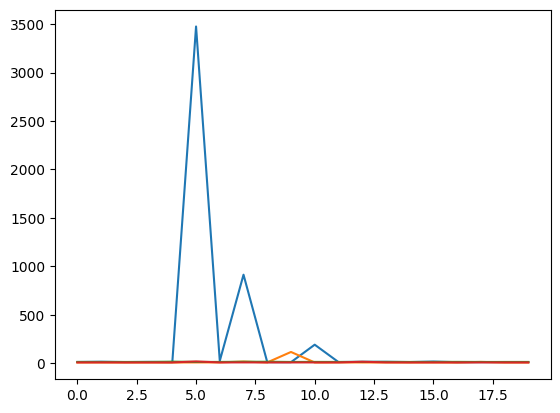

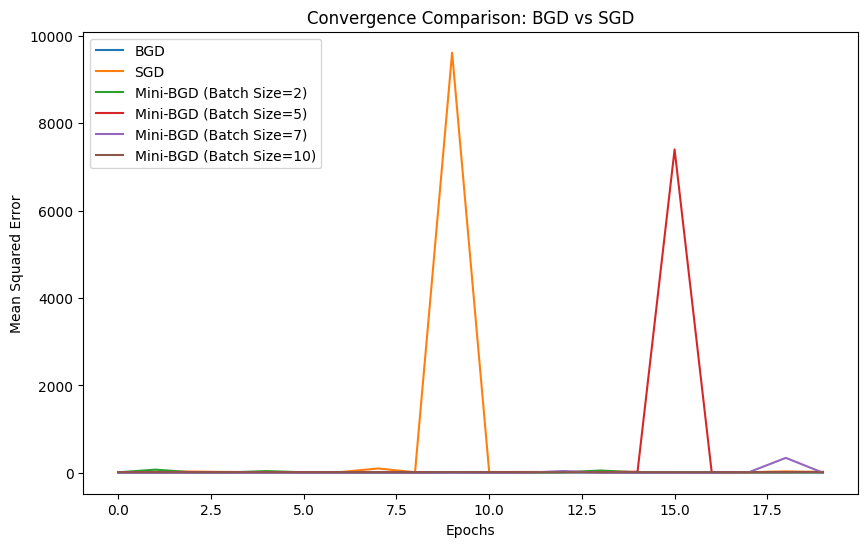

In [2]:
# provide your code here. TODO

import numpy as np
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Load the California housing dataset
housing_data = fetch_california_housing()
X = housing_data.data
y = housing_data.target
print("dataset size:{}".format(X.shape[0]))

# Spliting the dataset into train and test sets [80:20]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Stansdardizing the attributes of the Dataset
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Add the column of 1 values to X
X_train_scaled = np.c_[np.ones((X_train_scaled.shape[0], 1)), X_train_scaled]
X_test_scaled = np.c_[np.ones((X_test_scaled.shape[0], 1)), X_test_scaled]


# Linear Regression Model
class LinearRegression:
    def __init__(self):
        self.theta = None
    
    def fit(self, X, y, lr=0.01, epochs=20, batch_size=None, verbose=True):
        self.theta = np.random.randn(X.shape[1])
        # size of the dataset
        m = X.shape[0]
        loss_history = []

        for epoch in range(epochs):
            num_batches = m // batch_size if batch_size else 1
            # Iterate over the batches in each epoch
            for batch in range(num_batches):
                # If a batch_size is provided, it means to perform mini-batch gradient descent, where the training dataset is divided into smaller batches, and each batch is used to update the model's parameters.
                if batch_size:
                    #This line generates random indices from 0 to m (the total number of samples in the training set) without replacement. m is the size of the training dataset. The number of indices generated is equal to the batch_size.
                    indices = np.random.choice(m, batch_size)
                    # creates a mini-batch of input features for training
                    X_batch = X[indices]
                    # selects the corresponding subset of y for the mini-batch of input features
                    y_batch = y[indices]
                else:
                    # performing full-batch-gradient descent 
                    X_batch = X
                    y_batch = y
                # generating the predictions on X_batch
                y_pred = X_batch.dot(self.theta)
                error = y_pred - y_batch
            
                # computing the gradient of the loss function
                gradient = 2 * X_batch.T.dot(error)
                avg_gradient = sum(gradient)/ X_batch.shape[0]
            
                # updating the weights with the computed gradient
                self.theta -= lr * avg_gradient

            # print the Mean Squared Error (MSE) and store it in the loss_history list at certain intervals during the training process. 
            y_train_pred = X.dot(self.theta)
            mse = mean_squared_error(y, y_train_pred)
            loss_history.append(mse)
                
        
        return loss_history


# Batch Gradient Descent (BGD)
bgd_model = LinearRegression()
bgd_loss_history = bgd_model.fit(X_train_scaled, y_train)


# Stochastic Gradient Descent (SGD)
sgd_model = LinearRegression()
sgd_loss_history = sgd_model.fit(X_train_scaled, y_train, batch_size=1)

bgd_mini_model = LinearRegression()

batch_sizes = [2, 5, 7, 10]

for batch_size in batch_sizes:
    bgd_mini_model = LinearRegression()
    bgd_mini_model_history = bgd_mini_model.fit(X_train_scaled, y_train, batch_size=batch_size)
    
    plt.plot(bgd_mini_model_history, label=f'Mini-BGD (Batch Size={batch_size})')



# Model Evaluation
def evaluate_model(model, X_test, y_test):
    y_pred = X_test.dot(model.theta)
    mse = mean_squared_error(y_test, y_pred)
    return mse

bgd_mse = evaluate_model(bgd_model, X_test_scaled, y_test)
sgd_mse = evaluate_model(sgd_model, X_test_scaled, y_test)
bgd_mini_mse = evaluate_model(bgd_mini_model, X_test_scaled, y_test)

print("BGD MSE:", bgd_mse)
print("SGD MSE:", sgd_mse)

# Visualization
plt.figure(figsize=(10, 6))
plt.plot(bgd_loss_history, label='BGD')
plt.plot(sgd_loss_history, label='SGD')
for batch_size in batch_sizes:
    bgd_mini_model = LinearRegression()
    bgd_mini_model_history = bgd_mini_model.fit(X_train_scaled, y_train, batch_size=batch_size)
    
    plt.plot(bgd_mini_model_history, label=f'Mini-BGD (Batch Size={batch_size})')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.title('Convergence Comparison: BGD vs SGD')
plt.legend()
plt.show()


With the exception of batch size = 5 every Mini-BGD has consistent low MSE meaning they have low error percentages and have relative low errors. It is a better way of producing a low MSE than the SGD method. 